# Fuzzy Tsukamoto untuk Kelayakan Kredit

Nama : Firdaus Hajiyansah
<br>NIM : 221011402153
<br>Kelas : 05TPLE018
<br>**UAS KECERDASAN BUATAN**


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Agar plot inline (jika di Jupyter Notebook)
%matplotlib inline

## Bagian 1. Kelas Dasar (BaseFuzzy)

Menyediakan fungsi *up*, *down*, *rev_up*, dan *rev_down*.

In [2]:
class BaseFuzzy:
    def __init__(self):
        self.min_value = 0
        self.max_value = 0

    def down(self, x):
        """Membership linear turun (1 -> 0) di [min_value..max_value]."""
        return (self.max_value - x) / (self.max_value - self.min_value)

    def up(self, x):
        """Membership linear naik (0 -> 1) di [min_value..max_value]."""
        return (x - self.min_value) / (self.max_value - self.min_value)

    def rev_down(self, f):
        """Inverse membership turun => x = max - f*(max-min)."""
        return self.max_value - f*(self.max_value - self.min_value)

    def rev_up(self, f):
        """Inverse membership naik => x = f*(max-min) + min."""
        return f*(self.max_value - self.min_value) + self.min_value

## Bagian 2. Definisi Variabel Fuzzy

### 2.a Pendapatan (Income)
- Range: 0..50 (juta rupiah per bulan)
- Himpunan fuzzy: Rendah, Menengah, Tinggi

In [3]:
class Income(BaseFuzzy):
    def __init__(self, x):
        super().__init__()
        self.x = x  # Pendapatan (juta)

    def rendah(self):
        """
        - Rendah = 1 di [0..10], lalu turun 10..20 => 0 di >=20
        """
        if self.x <= 10:
            return 1.0
        elif self.x >= 20:
            return 0.0
        else:
            self.min_value, self.max_value = 10, 20
            return max(0, min(1, self.down(self.x)))

    def menengah(self):
        """
        - 0 di <10
        - naik 10..20
        - puncak 1 di 20..30
        - turun 30..40
        - 0 di >=40
        """
        if self.x < 10 or self.x > 40:
            return 0.0
        elif 10 <= self.x < 20:
            self.min_value, self.max_value = 10, 20
            return max(0, min(1, self.up(self.x)))
        elif 20 <= self.x <= 30:
            return 1.0
        else:  # 30..40
            self.min_value, self.max_value = 30, 40
            return max(0, min(1, self.down(self.x)))

    def tinggi(self):
        """
        - 0 di <=30, naik 30..40, 1 di >=40
        """
        if self.x <= 30:
            return 0.0
        elif self.x >= 40:
            return 1.0
        else:
            self.min_value, self.max_value = 30, 40
            return max(0, min(1, self.up(self.x)))

### 2.b Utang (Debt)
- Range: 0..50 (juta)
- Himpunan fuzzy: Kecil, Sedang, Besar

In [4]:
class Debt(BaseFuzzy):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def kecil(self):
        """
        - Kecil = 1 di [0..5], turun 5..15 => 0 di >=15
        """
        if self.x <= 5:
            return 1.0
        elif self.x >= 15:
            return 0.0
        else:
            self.min_value, self.max_value = 5, 15
            return max(0, min(1, self.down(self.x)))

    def sedang(self):
        """
        - 0 di <5
        - naik 5..15
        - puncak 1 di 15..25
        - turun 25..35
        - 0 di >35
        """
        if self.x < 5 or self.x > 35:
            return 0.0
        elif 5 <= self.x < 15:
            self.min_value, self.max_value = 5, 15
            return max(0, min(1, self.up(self.x)))
        elif 15 <= self.x <= 25:
            return 1.0
        else:  # 25..35
            self.min_value, self.max_value = 25, 35
            return max(0, min(1, self.down(self.x)))

    def besar(self):
        """
        - Besar = 0 di <=25, naik 25..35, 1 di >=35
        """
        if self.x <= 25:
            return 0.0
        elif self.x >= 35:
            return 1.0
        else:
            self.min_value, self.max_value = 25, 35
            return max(0, min(1, self.up(self.x)))

### 2.c Riwayat Kredit (CreditHistory)
- Range: 0..10 (0 terburuk, 10 terbaik)
- Himpunan fuzzy: Buruk, Cukup, Baik

In [5]:
class CreditHistory(BaseFuzzy):
    def __init__(self, x):
        super().__init__()
        self.x = x

    def buruk(self):
        """
        - Buruk = 1 di [0..3], turun 3..5 => 0 di >=5
        """
        if self.x <= 3:
            return 1.0
        elif self.x >= 5:
            return 0.0
        else:
            self.min_value, self.max_value = 3, 5
            return max(0, min(1, self.down(self.x)))

    def cukup(self):
        """
        - 0 di <3
        - naik 3..5
        - puncak 1 di 5..7
        - turun 7..8
        - 0 di >=8
        """
        if self.x < 3 or self.x >= 8:
            return 0.0
        elif 3 <= self.x < 5:
            self.min_value, self.max_value = 3, 5
            return max(0, min(1, self.up(self.x)))
        elif 5 <= self.x <= 7:
            return 1.0
        else:  # 7..8
            self.min_value, self.max_value = 7, 8
            return max(0, min(1, self.down(self.x)))

    def baik(self):
        """
        - Baik = 0 di <=5, naik 5..8, 1 di >=8
        """
        if self.x <= 5:
            return 0.0
        elif self.x >= 8:
            return 1.0
        else:
            self.min_value, self.max_value = 5, 8
            return max(0, min(1, self.up(self.x)))

### 2.d Kelayakan (Eligibility)
- Range: 0..100
- Himpunan fuzzy: Tidak Layak (0..25), Layak Sebagian (25..75), Layak (75..100)
  - Digunakan metode **Tsukamoto** sehingga kita perlu `rev_tidak_layak()`, `rev_layak_sebagian()`, dan `rev_layak()`.

In [6]:
class Eligibility(BaseFuzzy):
    def __init__(self):
        super().__init__()
        self.min_value = 0
        self.max_value = 100
        self.f = 0.0  # firing strength

    def rev_tidak_layak(self):
        """
        - Tidak Layak => range 0..25 (membership turun)
        """
        old_min, old_max = self.min_value, self.max_value
        self.min_value, self.max_value = 0, 25
        val = self.rev_down(self.f)
        self.min_value, self.max_value = old_min, old_max
        return val

    def rev_layak_sebagian(self):
        """
        - Layak Sebagian => range 25..75 (membership naik)
        """
        old_min, old_max = self.min_value, self.max_value
        self.min_value, self.max_value = 25, 75
        val = self.rev_up(self.f)
        self.min_value, self.max_value = old_min, old_max
        return val

    def rev_layak(self):
        """
        - Layak => range 75..100 (membership naik)
        """
        old_min, old_max = self.min_value, self.max_value
        self.min_value, self.max_value = 75, 100
        val = self.rev_up(self.f)
        self.min_value, self.max_value = old_min, old_max
        return val

## Bagian 3. Rule Base
Beberapa contoh rule yang lebih "nyata" untuk sistem kelayakan kredit.

In [7]:
rule_base = {
    # R1: Income rendah + Debt besar + History buruk => Tidak Layak
    ('rendah','besar','buruk'): 'tidak_layak',
    # R2: Income rendah + Debt besar + History cukup => Tidak Layak
    ('rendah','besar','cukup'): 'tidak_layak',
    # R3: Income rendah + Debt sedang + History buruk => Tidak Layak
    ('rendah','sedang','buruk'): 'tidak_layak',
    # R4: Income rendah + Debt kecil + History buruk => Tidak Layak
    ('rendah','kecil','buruk'): 'tidak_layak',

    # R5: Income tinggi + Debt kecil + History baik => Layak
    ('tinggi','kecil','baik'): 'layak',
    # R6: Income tinggi + Debt sedang + History baik => Layak
    ('tinggi','sedang','baik'): 'layak',
    # R7: Income menengah + Debt kecil + History baik => Layak
    ('menengah','kecil','baik'): 'layak',

    # R8: Income menengah + Debt sedang + History cukup => Layak Sebagian
    ('menengah','sedang','cukup'): 'layak_sebagian',
    # R9: Income menengah + Debt kecil + History cukup => Layak Sebagian
    ('menengah','kecil','cukup'): 'layak_sebagian',
    # R10: Income tinggi + Debt kecil + History cukup => Layak Sebagian
    ('tinggi','kecil','cukup'): 'layak_sebagian',
    # R11: Income tinggi + Debt sedang + History buruk => Layak Sebagian
    ('tinggi','sedang','buruk'): 'layak_sebagian',
    # R12: Income menengah + Debt besar + History baik => Layak Sebagian
    ('menengah','besar','baik'): 'layak_sebagian'
}

## Bagian 4. Fungsi Utilitas
Menyediakan fungsi untuk mendapatkan _membership value_ setiap himpunan (Pendapatan, Utang, Riwayat) dan menghitung skor Tsukamoto.

In [8]:
def get_income_fuzzy(val):
    obj = Income(val)
    return {
        'rendah': obj.rendah(),
        'menengah': obj.menengah(),
        'tinggi': obj.tinggi()
    }

def get_debt_fuzzy(val):
    obj = Debt(val)
    return {
        'kecil': obj.kecil(),
        'sedang': obj.sedang(),
        'besar': obj.besar()
    }

def get_history_fuzzy(val):
    obj = CreditHistory(val)
    return {
        'buruk': obj.buruk(),
        'cukup': obj.cukup(),
        'baik': obj.baik()
    }

def fuzzy_tsukamoto(income_val, debt_val, hist_val):
    """
    Hitung Kelayakan (range 0..100)
    dengan metode Tsukamoto.
    """
    inc_sets = get_income_fuzzy(income_val)
    dbt_sets = get_debt_fuzzy(debt_val)
    hst_sets = get_history_fuzzy(hist_val)

    eligibility = Eligibility()

    numerator = 0.0
    denominator = 0.0

    # Periksa semua kombinasi himpunan
    for i_key, i_val in inc_sets.items():
        for d_key, d_val in dbt_sets.items():
            for h_key, h_val in hst_sets.items():
                alpha = min(i_val, d_val, h_val)
                if alpha > 0:
                    # Cek rule
                    if (i_key, d_key, h_key) in rule_base:
                        out_rule = rule_base[(i_key, d_key, h_key)]
                        eligibility.f = alpha

                        if out_rule == 'tidak_layak':
                            z = eligibility.rev_tidak_layak()
                        elif out_rule == 'layak_sebagian':
                            z = eligibility.rev_layak_sebagian()
                        else: # 'layak'
                            z = eligibility.rev_layak()

                        numerator += alpha * z
                        denominator += alpha

    if denominator == 0:
        return 0.0
    else:
        return numerator / denominator

## Bagian 5. Plot Membership
Fungsi untuk menampilkan kurva *membership function* untuk setiap variabel (Pendapatan, Utang, Riwayat, dan Kelayakan).

In [9]:
def plot_income_membership():
    X = np.linspace(0,50,200)
    inc_obj = Income(0)
    y_rendah, y_menengah, y_tinggi = [], [], []
    for x in X:
        inc_obj.x = x
        y_rendah.append(inc_obj.rendah())
        y_menengah.append(inc_obj.menengah())
        y_tinggi.append(inc_obj.tinggi())

    plt.figure(figsize=(7,4))
    plt.plot(X, y_rendah, label='Rendah')
    plt.plot(X, y_menengah, label='Menengah')
    plt.plot(X, y_tinggi, label='Tinggi')
    plt.title('Membership Pendapatan (0..50 jt)')
    plt.ylim(-0.1,1.1)
    plt.xlabel('Pendapatan (jt)')
    plt.ylabel('Degree of Membership')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_debt_membership():
    X = np.linspace(0,50,200)
    dbt_obj = Debt(0)
    y_kecil, y_sedang, y_besar = [], [], []
    for x in X:
        dbt_obj.x = x
        y_kecil.append(dbt_obj.kecil())
        y_sedang.append(dbt_obj.sedang())
        y_besar.append(dbt_obj.besar())

    plt.figure(figsize=(7,4))
    plt.plot(X, y_kecil, label='Kecil')
    plt.plot(X, y_sedang, label='Sedang')
    plt.plot(X, y_besar, label='Besar')
    plt.title('Membership Utang (0..50 jt)')
    plt.ylim(-0.1,1.1)
    plt.xlabel('Utang (jt)')
    plt.ylabel('Degree of Membership')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_history_membership():
    X = np.linspace(0,10,200)
    h_obj = CreditHistory(0)
    y_buruk, y_cukup, y_baik = [], [], []
    for x in X:
        h_obj.x = x
        y_buruk.append(h_obj.buruk())
        y_cukup.append(h_obj.cukup())
        y_baik.append(h_obj.baik())

    plt.figure(figsize=(7,4))
    plt.plot(X, y_buruk, label='Buruk')
    plt.plot(X, y_cukup, label='Cukup')
    plt.plot(X, y_baik, label='Baik')
    plt.title('Membership Riwayat Kredit (0..10)')
    plt.ylim(-0.1,1.1)
    plt.xlabel('Skor Riwayat')
    plt.ylabel('Degree of Membership')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_eligibility_membership():
    X = np.linspace(0,100,200)
    elig_obj = Eligibility()

    not_eligible, partial_eligible, eligible = [], [], []

    for x in X:
        # Tidak Layak => menurun 0..25
        if x <= 0:
            m_tl = 1.0
        elif x >= 25:
            m_tl = 0.0
        else:
            elig_obj.min_value, elig_obj.max_value = 0, 25
            m_tl = elig_obj.down(x)
        not_eligible.append(m_tl)

        # Layak Sebagian => range 25..75 (kita buat segitiga up-down)
        if x < 25 or x > 75:
            m_ls = 0.0
        elif 25 <= x <= 50:
            elig_obj.min_value, elig_obj.max_value = 25, 50
            m_ls = elig_obj.up(x)
        else:  # 50..75 menurun
            elig_obj.min_value, elig_obj.max_value = 50, 75
            m_ls = elig_obj.down(x)
        partial_eligible.append(m_ls)

        # Layak => naik 75..100
        if x <= 75:
            m_l = 0.0
        elif x >= 100:
            m_l = 1.0
        else:
            elig_obj.min_value, elig_obj.max_value = 75, 100
            m_l = elig_obj.up(x)
        eligible.append(m_l)

    plt.figure(figsize=(7,4))
    plt.plot(X, not_eligible, label='Tidak Layak')
    plt.plot(X, partial_eligible, label='Layak Sebagian')
    plt.plot(X, eligible, label='Layak')
    plt.title('Membership Kelayakan (0..100)')
    plt.ylim(-0.1,1.1)
    plt.xlabel('Kelayakan')
    plt.ylabel('Degree of Membership')
    plt.grid(True)
    plt.legend()
    plt.show()

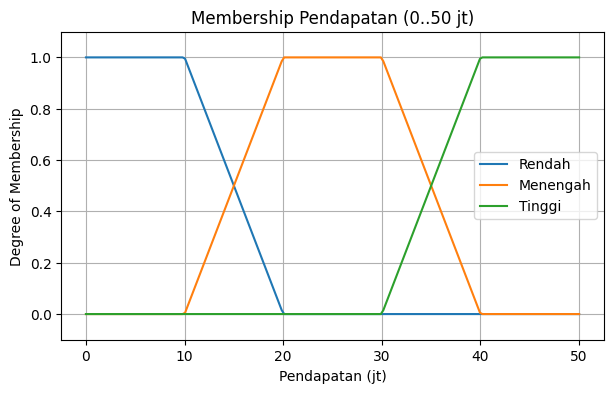

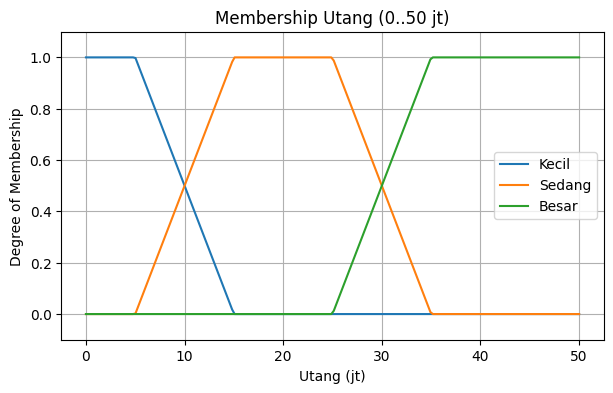

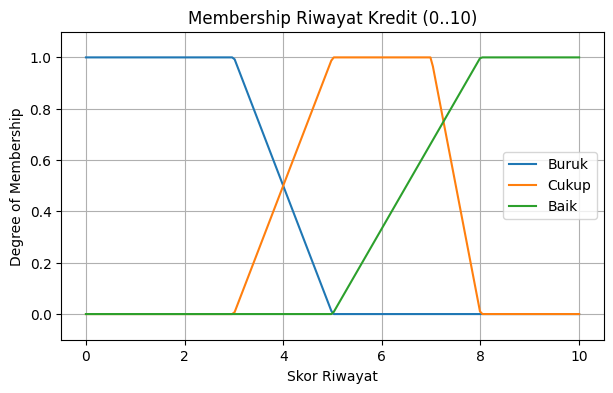

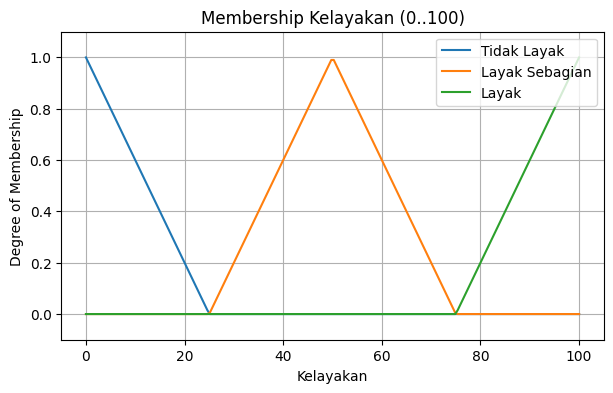

In [16]:
    plot_income_membership()
    plot_debt_membership()
    plot_history_membership()
    plot_eligibility_membership()

## Bagian 6. Interpretasi Hasil Per Nasabah
Kita buat fungsi untuk mengubah *score* (0..100) menjadi kategori:
- 0 <= score < 25  => Tidak Layak
- 25 <= score < 75 => Layak Sebagian
- 75 <= score <= 100 => Layak

In [10]:
def interpret_result(score):
    if score < 25:
        return "Tidak Layak"
    elif score < 75:
        return "Layak Sebagian"
    else:
        return "Layak"

## Bagian 7. Interpretasi Rata-rata
Menentukan apakah secara keseluruhan "Layak (secara keseluruhan)" atau "Tidak Layak" tergantung rata-rata.
Misal *threshold* = 50.

In [11]:
def interpret_average(avg_score):
    """
    - Jika >= 50 => "Layak (secara keseluruhan)"
    - Jika <  50 => "Tidak Layak (secara keseluruhan)"
    """
    if avg_score >= 50:
        return "Layak (secara keseluruhan)"
    else:
        return "Tidak Layak (secara keseluruhan)"

## Bagian 8. Eksekusi Utama
Memuat contoh data uji, dan perhitungan.
Terakhir, ditampilkan **rata-rata** seluruh data.

In [20]:

if __name__ == "__main__":

    # 2) Beberapa data "nyata"
    data_uji = [
        # (nama, pendapatan, utang, riwayat)
        ("Asep",  8,  25, 4),
        ("Budi", 12,  10, 6),
        ("Cici", 45,   5, 9),
        ("Dedi", 35,  30, 5),
        ("Evi",  20,  16, 2),
        ("Fikri",10,  40, 8),
        ("Gina", 28,  12, 7),
        ("Hasan",50,  10, 3)
    ]

    print("\n=== HASIL PENILAIAN KELAYAKAN KREDIT (PER INDIVIDU) ===")
    scores = []
    for nama, inc_val, debt_val, hist_val in data_uji:
        score = fuzzy_tsukamoto(inc_val, debt_val, hist_val)
        label = interpret_result(score)
        scores.append(score)
        print(f"{nama:5s} | Pendapatan={inc_val}jt | Utang={debt_val}jt | Riwayat={hist_val} "
              f"=> Kelayakan={score:.2f} => {label}")

    # 3) Hitung rata-rata
    avg_score = np.mean(scores)
    overall = interpret_average(avg_score)

    print("\n=== FINAL RESULT (RATA-RATA) ===")
    print(f"Rata-rata Kelayakan = {avg_score:.2f} => {overall}")
    print("\nSelesai.")


=== HASIL PENILAIAN KELAYAKAN KREDIT (PER INDIVIDU) ===
Asep  | Pendapatan=8jt | Utang=25jt | Riwayat=4 => Kelayakan=12.50 => Tidak Layak
Budi  | Pendapatan=12jt | Utang=10jt | Riwayat=6 => Kelayakan=50.00 => Layak Sebagian
Cici  | Pendapatan=45jt | Utang=5jt | Riwayat=9 => Kelayakan=100.00 => Layak
Dedi  | Pendapatan=35jt | Utang=30jt | Riwayat=5 => Kelayakan=50.00 => Layak Sebagian
Evi   | Pendapatan=20jt | Utang=16jt | Riwayat=2 => Kelayakan=0.00 => Tidak Layak
Fikri | Pendapatan=10jt | Utang=40jt | Riwayat=8 => Kelayakan=0.00 => Tidak Layak
Gina  | Pendapatan=28jt | Utang=12jt | Riwayat=7 => Kelayakan=60.58 => Layak Sebagian
Hasan | Pendapatan=50jt | Utang=10jt | Riwayat=3 => Kelayakan=50.00 => Layak Sebagian

=== FINAL RESULT (RATA-RATA) ===
Rata-rata Kelayakan = 40.38 => Tidak Layak (secara keseluruhan)

Selesai.
